In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pprint

In [3]:
Ocean_Temps = Path("Ocean_Temps.csv")
ocean_df = pd.read_csv(Ocean_Temps)
ocean_df.head(100)


,time,weather_code (wmo code),temperature_2m_max (°F),temperature_2m_min (°F),wind_speed_10m_max (mp/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,1/1/1945,1,75.1,57.2,17.9,137,7.19
1,1/2/1945,1,80.3,56.2,13.0,157,6.96
2,1/3/1945,51,70.7,61.0,11.4,190,3.79
3,1/4/1945,2,70.7,61.1,15.2,156,5.46
4,1/5/1945,0,84.7,58.6,10.3,146,7.44
...,...,...,...,...,...,...,...
95,4/6/1945,1,79.3,63.6,14.6,123,4.42
96,4/7/1945,2,72.4,64.3,14.1,144,2.82
97,4/8/1945,3,71.7,62.7,8.5,168,2.33
98,4/9/1945,3,73.8,63.9,9.8,163,2.68


In [12]:
# Convert the 'date' column to datetime format
ocean_df['date'] = pd.to_datetime(ocean_df['time'], infer_datetime_format=True)
columns_data = ['temperature_2m_max (°F)', 'temperature_2m_min (°F)', 'wind_speed_10m_max (mp/h)', 'wind_direction_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)']

# Filter the dataframe to include only September dates
df_september = ocean_df[ocean_df['date'].dt.month == 9]

# Group the filtered dataframe by the year
df_grouped = df_september.groupby(df_september['date'].dt.year)

# Calculate the average 'maxtemp' and 'mintemp' for each group
df_average = df_grouped[columns_data].mean()

# Rename the columns
df_average.columns = ['Avg Ocean Max Temp', 'Avg Ocean Min Temp ', 'Ocean Wind Speed', 'Ocean Wind Direction', 'Ocean Evapotrasnpiration']

# Reset the index to make 'year' a column
df_average = df_average.reset_index()

# Print the resulting dataframe
ocean_final_df = pd.DataFrame(df_average)
ocean_final_df

C:\Users\LakiaWhite\AppData\Local\Temp\ipykernel_69768\2589691798.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ocean_df['date'] = pd.to_datetime(ocean_df['time'], infer_datetime_format=True)


,date,Avg Ocean Max Temp,Avg Ocean Min Temp,Ocean Wind Speed,Ocean Wind Direction,Ocean Evapotrasnpiration
0,1945,65.646667,53.420000,11.696667,194.900000,2.839000
1,1946,61.250000,50.146667,11.866667,225.200000,2.511333
2,1947,62.130000,50.490000,11.840000,185.333333,2.670000
3,1948,60.400000,48.750000,12.526667,233.300000,2.655000
4,1949,63.376667,51.976667,12.990000,220.700000,2.766333
...,...,...,...,...,...,...
74,2019,65.336667,57.003333,19.866667,195.933333,3.050000
75,2020,60.860000,53.223333,19.173333,218.033333,2.734000
76,2021,61.570000,54.183333,21.096667,197.900000,2.994333
77,2022,61.663333,53.810000,18.273333,218.466667,2.859667


In [4]:
#Export Ocean Average as csv


In [13]:
#Run Desert averages analysis
Desert_Temps = Path("Desert_Temps.csv")
desert_df = pd.read_csv(Desert_Temps)
desert_df.head(100)


,time,weather_code (wmo code),temperature_2m_max (°F),temperature_2m_min (°F),wind_speed_10m_max (mp/h),wind_direction_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,1945-01-01,1,56.2,31.8,11.6,340,3.76
1,1945-01-02,0,54.5,31.1,15.5,334,4.15
2,1945-01-03,0,53.6,27.9,12.9,354,3.77
3,1945-01-04,0,52.3,23.7,10.8,71,3.34
4,1945-01-05,0,51.5,24.5,14.1,106,3.76
...,...,...,...,...,...,...,...
95,1945-04-06,0,77.6,48.5,9.2,98,6.74
96,1945-04-07,1,78.2,50.9,9.4,106,6.66
97,1945-04-08,0,79.9,50.1,8.2,250,6.50
98,1945-04-09,0,81.6,52.5,10.7,307,7.03


In [14]:
# Convert the 'date' column to datetime format
desert_df['date'] = pd.to_datetime(desert_df['time'], infer_datetime_format=True)
columns_data = ['temperature_2m_max (°F)', 'temperature_2m_min (°F)', 'wind_speed_10m_max (mp/h)', 'wind_direction_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)']

# Filter the dataframe to include only September dates
df_september = desert_df[desert_df['date'].dt.month == 9]

# Group the filtered dataframe by the year
df_grouped = df_september.groupby(df_september['date'].dt.year)

# Calculate the average 'maxtemp' and 'mintemp' for each group
df_average = df_grouped[columns_data].mean()

# Rename the columns
df_average.columns = ['Avg Desert Max Temp', 'Avg Desert Min Temp', 'Desert Wind Speed', 'Desert Wind Direction', 'Desert Evapotrasnpiration']

# Reset the index to make 'year' a column
df_average = df_average.reset_index()

# Print the resulting dataframe
desert_final_df = pd.DataFrame(df_average)
desert_final_df

C:\Users\LakiaWhite\AppData\Local\Temp\ipykernel_69768\671295355.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  desert_df['date'] = pd.to_datetime(desert_df['time'], infer_datetime_format=True)


,date,Avg Desert Max Temp,Avg Desert Min Temp,Desert Wind Speed,Desert Wind Direction,Desert Evapotrasnpiration
0,1945,89.376667,65.470000,14.916667,135.400000,8.351000
1,1946,87.130000,64.520000,15.170000,124.500000,7.961333
2,1947,88.626667,67.623333,16.666667,132.966667,7.877333
3,1948,89.186667,68.453333,13.246667,121.800000,7.400333
4,1949,87.946667,64.596667,15.620000,143.000000,8.413667
...,...,...,...,...,...,...
74,2019,90.710000,70.553333,16.430000,91.800000,8.239333
75,2020,90.963333,70.366667,16.233333,98.000000,8.495000
76,2021,90.276667,69.916667,16.486667,89.333333,8.695000
77,2022,91.476667,70.496667,15.076667,112.300000,8.045333


In [15]:
ocean_final_df = ocean_final_df.rename(columns={'date': 'Year'})
desert_final_df = desert_final_df.rename(columns={'date': 'Year'})

ocean_final_df.to_csv('OceanAverages.csv', index=False)
desert_final_df.to_csv('DesertAverages.csv', index=False)

In [16]:
hurr_path = Path("Hurricanes_Original.csv")
hurricane_df = pd.read_csv(hurr_path)

# Merge the DataFrames on the "Year" column
merged_df = pd.merge(hurricane_df, ocean_final_df, on='Year', how='inner')
merged_df = pd.merge(merged_df, desert_final_df, on='Year', how='inner')

In [19]:
years_data = merged_df[(merged_df['Year'] >= 1945) & (merged_df['Year'] <= 2017)]
years_data = years_data.drop('Unnamed: 0', axis=1)
years_data

,Year,Named Storms,Hurricanes,MajorHurricanes,Avg Ocean Max Temp,Avg Ocean Min Temp,Ocean Wind Speed,Ocean Wind Direction,Ocean Evapotrasnpiration,Avg Desert Max Temp,Avg Desert Min Temp,Desert Wind Speed,Desert Wind Direction,Desert Evapotrasnpiration
0,1945,11,5,2,65.646667,53.420000,11.696667,194.900000,2.839000,89.376667,65.470000,14.916667,135.400000,8.351000
1,1946,6,3,1,61.250000,50.146667,11.866667,225.200000,2.511333,87.130000,64.520000,15.170000,124.500000,7.961333
2,1947,9,5,2,62.130000,50.490000,11.840000,185.333333,2.670000,88.626667,67.623333,16.666667,132.966667,7.877333
3,1948,9,6,4,60.400000,48.750000,12.526667,233.300000,2.655000,89.186667,68.453333,13.246667,121.800000,7.400333
4,1949,13,7,3,63.376667,51.976667,12.990000,220.700000,2.766333,87.946667,64.596667,15.620000,143.000000,8.413667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2013,14,2,0,58.763333,54.073333,12.596667,255.566667,2.723000,91.760000,68.343333,13.713333,170.600000,7.743000
69,2014,8,6,2,61.203333,55.613333,11.620000,216.966667,2.730333,92.663333,69.330000,15.270000,96.366667,8.317667
70,2015,11,4,2,61.023333,55.083333,12.553333,207.900000,2.584667,92.596667,70.083333,13.420000,147.900000,7.361000
71,2016,15,7,4,60.666667,55.720000,10.856667,193.333333,2.775000,92.130000,69.736667,14.666667,108.900000,8.014333


In [20]:
years_data.to_csv('merged.csv', index=False)

In [21]:
sorted_data = years_data.sort_values('Hurricanes', ascending=False)

# Select the top 10 rows from the sorted dataframe
top_10 = sorted_data.nlargest(10, 'Hurricanes')

# Sort the 'years_data' dataframe by the 'hurricanes' column in ascending order
sorted_data_asc = years_data.sort_values('Hurricanes')

# Select the bottom 10 rows from the sorted dataframe
bottom_10 = sorted_data_asc.nsmallest(10, 'Hurricanes')

# Concatenate the top_10 and bottom_10 dataframes to create the 'top_bottom_10' dataframe
top_bottom_10 = pd.concat([top_10, bottom_10])
top_bottom_10

,Year,Named Storms,Hurricanes,MajorHurricanes,Avg Ocean Max Temp,Avg Ocean Min Temp,Ocean Wind Speed,Ocean Wind Direction,Ocean Evapotrasnpiration,Avg Desert Max Temp,Avg Desert Min Temp,Desert Wind Speed,Desert Wind Direction,Desert Evapotrasnpiration
60,2005,28,15,7,60.690000,55.280000,11.553333,221.600000,2.735000,91.420000,69.553333,14.640000,117.933333,7.862667
24,1969,18,12,5,59.023333,52.920000,12.570000,235.166667,2.745000,93.493333,68.816667,13.983333,249.000000,8.309000
65,2010,19,12,5,60.756667,55.416667,12.036667,207.866667,2.754333,92.430000,69.663333,13.870000,99.400000,7.627000
50,1995,19,11,5,60.110000,54.953333,12.130000,222.933333,2.604667,93.873333,70.320000,15.093333,122.266667,8.482667
5,1950,13,11,8,60.100000,54.793333,12.076667,243.433333,2.530000,91.270000,67.876667,13.970000,138.133333,7.831667
53,1998,14,10,3,60.200000,54.673333,12.303333,211.533333,2.969000,93.846667,71.253333,14.500000,117.500000,7.991000
72,2017,17,10,6,62.973333,55.256667,21.440000,199.666667,3.090333,91.890000,69.940000,14.403333,138.333333,8.066000
67,2012,19,10,2,59.750000,54.026667,11.146667,238.633333,2.646000,91.166667,70.846667,14.480000,151.533333,7.583000
59,2004,15,9,6,61.770000,56.720000,11.616667,181.666667,2.949333,90.770000,66.016667,15.263333,157.800000,8.221333
10,1955,12,9,6,58.043333,52.480000,12.176667,205.733333,2.680000,91.576667,67.530000,12.823333,130.833333,7.559000


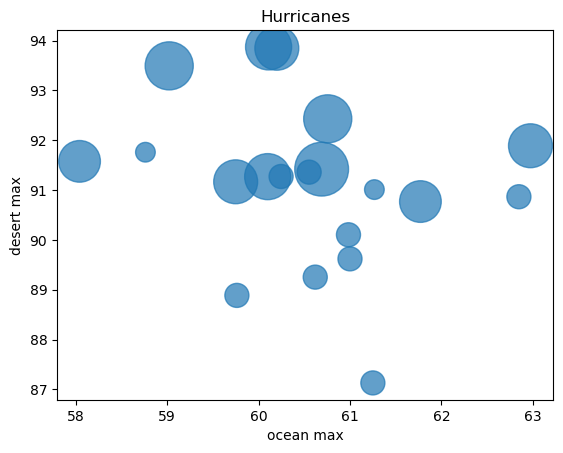

In [22]:
from matplotlib.pyplot import scatter
years = top_bottom_10['Year']
ocean_max = top_bottom_10['Avg Ocean Max Temp']
desert_max = top_bottom_10['Avg Desert Max Temp']
hurricanes = top_bottom_10['Hurricanes']

# Create scatter plot
plt.scatter(ocean_max, desert_max, s=hurricanes*100, alpha=0.7)

# Add labels and title
plt.xlabel('ocean max')
plt.ylabel('desert max')
plt.title('Hurricanes')

# Show the plot
plt.show()

C:\Users\cppar\AppData\Local\Temp\ipykernel_13348\633747333.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = years_data.groupby('Temp Bins').mean()


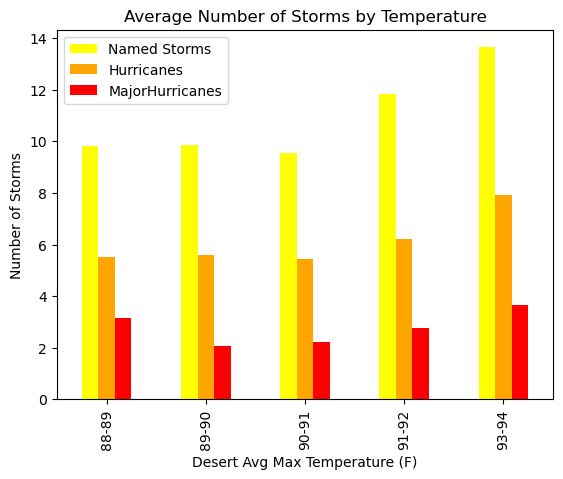

In [17]:
# Define the temperature bins
bins = [88, 89, 90, 91, 92, 94]

# Bin the temperature values and create a new column 'Temp Bins'
years_data['Temp Bins'] = pd.cut(years_data['Avg Desert Max Temp'], bins=bins, labels=['88-89', '89-90', '90-91', '91-92', '93-94'])

# Group the data by 'Temp Bins' and calculate the average number of storms
grouped_data = years_data.groupby('Temp Bins').mean()

# Plot the data
ax = grouped_data[['Named Storms', 'Hurricanes', 'MajorHurricanes']].plot(kind='bar', color=['yellow', 'orange', 'red'])

# Set the labels and title
ax.set_xlabel('Desert Avg Max Temperature (F)')
ax.set_ylabel('Number of Storms')
ax.set_title('Average Number of Storms by Temperature')

# Show the plot
plt.show()

C:\Users\LakiaWhite\AppData\Local\Temp\ipykernel_69768\168375237.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = years_data.groupby('Temp Bins').mean()[['Named Storms', 'Hurricanes', 'MajorHurricanes']]


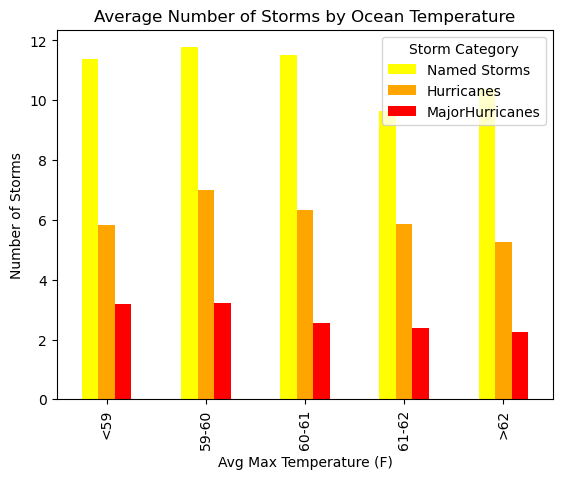

In [23]:
bins = [0, 59, 60, 61, 62, float('inf')]
labels = ['<59', '59-60', '60-61', '61-62', '>62']
years_data['Temp Bins'] = pd.cut(years_data['Avg Ocean Max Temp'], bins=bins, labels=labels)

grouped_data = years_data.groupby('Temp Bins').mean()[['Named Storms', 'Hurricanes', 'MajorHurricanes']]


grouped_data.plot(kind='bar', y=['Named Storms', 'Hurricanes', 'MajorHurricanes'], color=['yellow', 'orange', 'red'])

import matplotlib.pyplot as plt

plt.xlabel('Avg Max Temperature (F)')
plt.ylabel('Number of Storms')
plt.title('Average Number of Storms by Ocean Temperature')
plt.legend(title='Storm Category')
plt.show()


C:\Users\LakiaWhite\AppData\Local\Temp\ipykernel_69768\2850947178.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = years_data.groupby('Temp Bins').mean()[['Named Storms', 'Hurricanes', 'MajorHurricanes']]


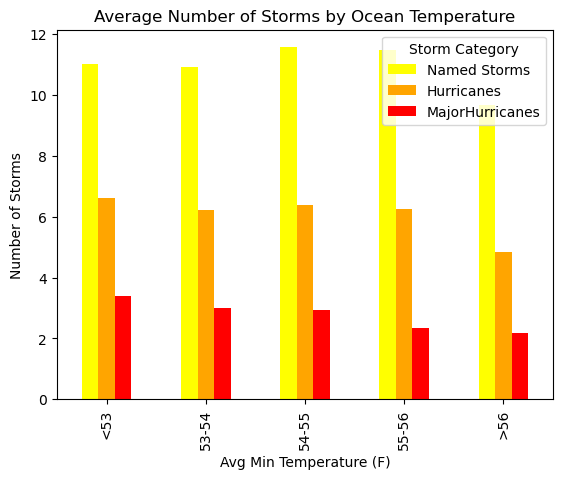

In [24]:
bins = [0, 53, 54, 55, 56, float('inf')]
labels = ['<53', '53-54', '54-55', '55-56', '>56']
years_data['Temp Bins'] = pd.cut(years_data['Avg Ocean Min Temp '], bins=bins, labels=labels)

grouped_data = years_data.groupby('Temp Bins').mean()[['Named Storms', 'Hurricanes', 'MajorHurricanes']]


grouped_data.plot(kind='bar', y=['Named Storms', 'Hurricanes', 'MajorHurricanes'], color=['yellow', 'orange', 'red'])

import matplotlib.pyplot as plt

plt.xlabel('Avg Min Temperature (F)')
plt.ylabel('Number of Storms')
plt.title('Average Number of Storms by Ocean Temperature')
plt.legend(title='Storm Category')
plt.show()


In [26]:
hurricanes = years_data['Hurricanes']
desert_temps = years_data['Avg Desert Max Temp']
ocean_temps = years_data['Avg Ocean Max Temp']

    # Calculate the correlation coefficient (r value)
r_desert, _ = pearsonr(hurricanes, desert_temps)
r_ocean, _ = pearsonr(hurricanes, ocean_temps)

plt.figure(figsize=(10, 6))
plt.scatter(hurricanes, desert_temps, color='orange', label='Desert Temperatures')
plt.scatter(hurricanes, ocean_temps, color='blue', label='Ocean Temperatures')
# Set labels and title
plt.xlabel('Number of Hurricanes Each Year')
plt.ylabel(' Average September Temperature')
plt.title('Number of Hurricanes vs Temperature\nCorrelation (r) - Desert: {:.2f}, Ocean: {:.2f}'.format(r_desert, r_ocean))
hovertemplate: 'Year'
    # Calculate the correlation coefficient (r value)
# r_desert, _ = pearsonr(hurricanes, desert_temps)
# r_ocean, _ = pearsonr(hurricanes, ocean_temps)
# Show the plot
plt.show()

NameError: name 'pearsonr' is not defined

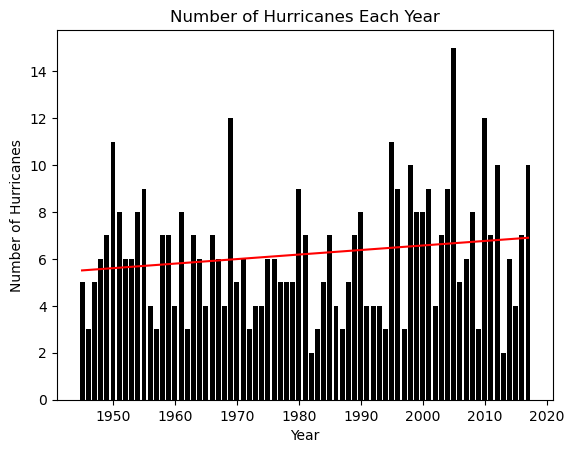

In [27]:
df = pd.read_csv('merged.csv')
from scipy.stats import linregress
# Plotting the bar chart for the number of hurricanes
plt.bar(df['Year'], df['Hurricanes'], color='black')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes Each Year')
# Calculate the trend line using linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Hurricanes'])
trend_line = slope * df['Year'] + intercept
# Plot the trend line
plt.plot(df['Year'], trend_line, color='red', label='Trend Line')
# Display the plot
plt.show()

In [28]:
# Establish bin
year_bins = [1945, 1955, 1965, 1975, 1985, 1995, 2005, 2017]
labels = ["1945-1954", "1955-1964", "1965-1974", "1975-1984", "1985-1994", "1995-2004", "2005-2017"]


# Use `pd.cut` to categorize year into bins.

merged_df["Year Bucket"] = pd.cut(merged_df["Year"].astype(int),year_bins, labels=labels)

merged_df

,Unnamed: 0,Year,Named Storms,Hurricanes,MajorHurricanes,Avg Ocean Max Temp,Avg Ocean Min Temp,Ocean Wind Speed,Ocean Wind Direction,Ocean Evapotrasnpiration,Avg Desert Max Temp,Avg Desert Min Temp,Desert Wind Speed,Desert Wind Direction,Desert Evapotrasnpiration,Year Bucket
0,95,1945,11,5,2,65.646667,53.420000,11.696667,194.900000,2.839000,89.376667,65.470000,14.916667,135.400000,8.351000,NaN
1,96,1946,6,3,1,61.250000,50.146667,11.866667,225.200000,2.511333,87.130000,64.520000,15.170000,124.500000,7.961333,1945-1954
2,97,1947,9,5,2,62.130000,50.490000,11.840000,185.333333,2.670000,88.626667,67.623333,16.666667,132.966667,7.877333,1945-1954
3,98,1948,9,6,4,60.400000,48.750000,12.526667,233.300000,2.655000,89.186667,68.453333,13.246667,121.800000,7.400333,1945-1954
4,99,1949,13,7,3,63.376667,51.976667,12.990000,220.700000,2.766333,87.946667,64.596667,15.620000,143.000000,8.413667,1945-1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,163,2013,14,2,0,58.763333,54.073333,12.596667,255.566667,2.723000,91.760000,68.343333,13.713333,170.600000,7.743000,2005-2017
69,164,2014,8,6,2,61.203333,55.613333,11.620000,216.966667,2.730333,92.663333,69.330000,15.270000,96.366667,8.317667,2005-2017
70,165,2015,11,4,2,61.023333,55.083333,12.553333,207.900000,2.584667,92.596667,70.083333,13.420000,147.900000,7.361000,2005-2017
71,166,2016,15,7,4,60.666667,55.720000,10.856667,193.333333,2.775000,92.130000,69.736667,14.666667,108.900000,8.014333,2005-2017


In [30]:

test_df = merged_df.groupby("Year Bucket")["MajorHurricanes"].sum().to_frame().reset_index()

test_df

C:\Users\LakiaWhite\AppData\Local\Temp\ipykernel_69768\1452952040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df = merged_df.groupby("Year Bucket")["MajorHurricanes"].sum().to_frame().reset_index()


,Year Bucket,MajorHurricanes
0,1945-1954,38
1,1955-1964,30
2,1965-1974,18
3,1975-1984,18
4,1985-1994,16
5,1995-2004,40
6,2005-2017,36


<Axes: >

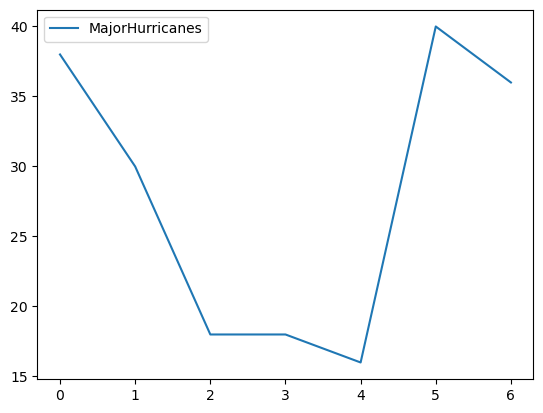

In [31]:
test_df.plot()


In [32]:
summary = merged_df.describe()

summary

,Unnamed: 0,Year,Named Storms,Hurricanes,MajorHurricanes,Avg Ocean Max Temp,Avg Ocean Min Temp,Ocean Wind Speed,Ocean Wind Direction,Ocean Evapotrasnpiration,Avg Desert Max Temp,Avg Desert Min Temp,Desert Wind Speed,Desert Wind Direction,Desert Evapotrasnpiration
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,131.000000,1981.000000,11.205479,6.205479,2.712329,60.391872,54.526256,12.346712,219.227854,2.709461,90.669543,67.592009,14.162877,149.742009,7.718155
std,21.217131,21.217131,4.143130,2.640280,1.889146,1.291516,1.456989,1.422659,22.262626,0.132916,1.734775,1.713629,1.353695,44.171459,0.484624
min,95.000000,1945.000000,4.000000,2.000000,0.000000,58.043333,48.750000,9.766667,169.733333,2.225667,87.130000,63.386667,11.660000,96.333333,6.437333
25%,113.000000,1963.000000,8.000000,4.000000,1.000000,59.716667,53.826667,11.576667,205.733333,2.648667,89.390000,66.450000,13.223333,117.933333,7.407000
50%,131.000000,1981.000000,11.000000,6.000000,2.000000,60.400000,54.953333,12.130000,220.700000,2.702667,90.866667,67.590000,14.073333,135.400000,7.743000
75%,149.000000,1999.000000,13.000000,8.000000,4.000000,60.973333,55.483333,12.956667,233.300000,2.776667,91.743333,68.996667,14.980000,175.900000,8.006667
max,167.000000,2017.000000,28.000000,15.000000,8.000000,65.646667,56.720000,21.440000,273.633333,3.090333,93.943333,71.253333,18.833333,270.000000,8.811333
